In [1]:
import pandas as pd
import seaborn as sns
import scipy.stats as ss
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_logprobs = pd.read_csv("../tom-tasks-private/preprocessed_logprobs.tsv", sep = "\t")

In [3]:
df_logprobs.columns

Index(['item_id', 'logprob', 'EleutherAI__pythia-14m___main',
       'meta-llama__Meta-Llama-3-8B-Instruct___main',
       'EleutherAI__pythia-31m___main', 'allenai__OLMo-2-1124-13B-DPO___main',
       'allenai__OLMo-2-1124-13B___main', 'EleutherAI__pythia-6.9b___main',
       'meta-llama__Meta-Llama-3-8B___main', 'EleutherAI__pythia-2.8b___main',
       'allenai__OLMo-2-1124-13B-SFT___main',
       'mistralai__Mistral-Nemo-Base-2407___main',
       'EleutherAI__pythia-12b___main',
       'nvidia__Llama-3.1-Nemotron-Nano-8B-v1___main',
       'EleutherAI__pythia-160m___main',
       'allenai__OLMo-2-1124-13B-Instruct___main',
       'EleutherAI__pythia-70m___main', 'EleutherAI__pythia-410m___main',
       'mistralai__Mistral-Nemo-Instruct-2407___main',
       'EleutherAI__pythia-1b___main', 'EleutherAI__pythia-1.4b___main'],
      dtype='object')

In [5]:
df_subset = df_logprobs[['item_id', 'logprob', 'EleutherAI__pythia-12b___main']]

In [6]:
# df_subset = df_logprobs[['item_id', 'logprob', 'meta-llama__Meta-Llama-3-8B___main']]

In [7]:
df_subset.columns

Index(['item_id', 'logprob', 'EleutherAI__pythia-12b___main'], dtype='object')

In [8]:
df_wide = df_subset.pivot(index='item_id', 
                   columns='logprob', 
                   values='EleutherAI__pythia-12b___main').reset_index()
df_wide.head(3)

logprob,item_id,end_logprob,start_logprob
0,10_fb_1_e_e_ex,-1.282227,-0.448975
1,10_fb_1_e_e_im,-0.258789,-1.699219
2,10_fb_1_e_s_ex,-1.182617,-0.464844


In [9]:
df_wide['log_odds_local'] = df_wide['start_logprob'] - df_wide['end_logprob']

In [10]:
df_passages = pd.read_csv("data/raw/fb.csv")[['item_id', 'passage', 'condition']]
df_passages.head(3)

,item_id,passage,condition
0,7_fb_1_s_e_ex,David and Marta go out to get some wine for th...,False Belief
1,7_fb_1_s_e_im,David and Marta go out to get some wine for th...,False Belief
2,7_tb_1_s_e_ex,David and Marta go out to get some wine for th...,True Belief


In [11]:
df_merged = pd.merge(df_passages, df_wide)

In [12]:
df_merged.shape

(192, 6)

In [13]:
df_llama = pd.read_csv("data/processed/fb/fb-pythia-12b.csv")[['passage', 'lp_start', 'lp_end', 'log_odds', 'condition', 'start', 'end']]

In [14]:
df_all = pd.merge(df_merged, df_llama)
df_all.shape

(192, 11)

Text(0, 0.5, 'HF endpoint estimation')

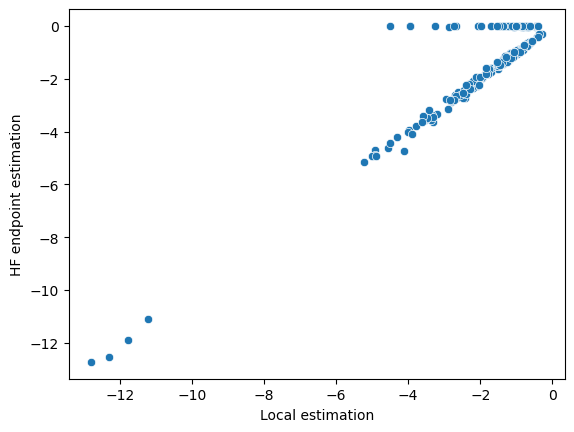

In [20]:
sns.scatterplot(data = df_all, x = "start_logprob", y = "lp_start")
plt.xlabel("Local estimation")
plt.ylabel("HF endpoint estimation")

Text(0, 0.5, 'HF endpoint estimation')

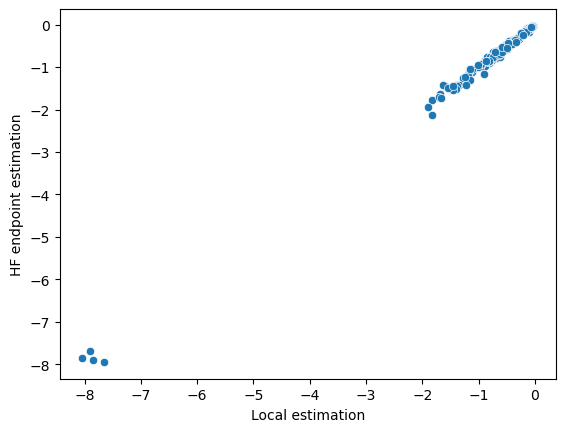

In [21]:
sns.scatterplot(data = df_all, x = "end_logprob", y = "lp_end")
plt.xlabel("Local estimation")
plt.ylabel("HF endpoint estimation")

Text(0, 0.5, 'HF endpoint estimation')

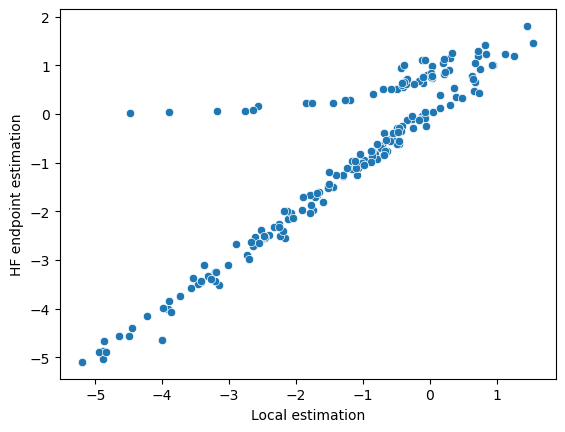

In [22]:
sns.scatterplot(data = df_all, x = "log_odds_local", y = "log_odds")
plt.xlabel("Local estimation")
plt.ylabel("HF endpoint estimation")

In [16]:
ss.pearsonr(df_all['log_odds_local'], df_all['log_odds'])

PearsonRResult(statistic=0.8913945108405985, pvalue=3.247577841207395e-67)

In [23]:
ss.pearsonr(df_all['start_logprob'], df_all['lp_start'])

PearsonRResult(statistic=0.925443934163454, pvalue=5.1473075712118807e-82)

In [24]:
ss.pearsonr(df_all['end_logprob'], df_all['lp_end'])

PearsonRResult(statistic=0.9984570160096011, pvalue=1.6710808246355e-240)

In [25]:
df_all['diff'] = np.abs(df_all['log_odds'] - df_all['log_odds_local'])

In [31]:
df_all[['start', 'diff']].groupby(["start"]).mean().reset_index()

,start,diff
0,box,0.076239
1,cupboard,1.044084
2,drawer,0.167900
3,garage,0.103058
4,hall,0.066994
5,shed,0.106461
6,sink,0.102570
7,stable,0.116707
8,suitcase,0.188282
9,toolbox,1.938877
